In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
def grey(img):
    return  np.dot(img[...,:3], [0.299, 0.587, 0.144])

In [3]:
# here is my local file path, please change it to your local file path...
left_loc, right_loc = "C:\\Users\\d09am\\Downloads\\HW1-right-gray.png", \
                      "C:\\Users\\d09am\\Downloads\\HW1-left-gray.png"
left, right = grey(plt.imread(left_loc)), grey(plt.imread(right_loc))

In [4]:
imgHeight, imgWidth = left.shape

In [8]:
dispartity_range = 10
block_size_half = 5
block_size = 2 * block_size_half + 1

In [9]:
# processing 
final = np.zeros((imgHeight, imgWidth))
for m in range(imgHeight):
    minr = max(0, m - block_size_half)
    maxr = min(imgHeight -1, m + block_size_half)
    
    for n in range(0, imgWidth):
        minc = max(0, n - block_size_half)
        maxc = min(imgWidth - 1, n + block_size_half)
        template = left[minr:maxr+1, minc:maxc+1]
        pos, val = -1, int(1e10)
        k = 0
        block_diff = []
        for i in range(-dispartity_range//2, dispartity_range//2 + 1):
            col1, col2 = minc+i, maxc+i
            if col1>=0 and col2<imgWidth:
                block = right[minr:maxr+1, col1:col2+1]
                temp = sum(sum(abs(template - block)))
                block_diff.append((temp, abs(i)))
                if temp<val:
                    val = temp
                    pos = k
                k+=1
        index = block_diff[pos][1]
        if pos in (0, len(block_diff)-1):
            final[m][n] = index
        else:
            C1 = block_diff[pos-1][0]
            C2 = block_diff[pos][0]
            C3 = block_diff[pos+1][0]
            final[m][n] = index - (0.5 * (C3 - C1) / (C1 - 2*C2 + C3))
    if m%20 == 0: print(int(100 * m / imgHeight), "% completed...")
print("100 % completed...")

0 % completed...
7 % completed...
15 % completed...
23 % completed...
31 % completed...
39 % completed...
46 % completed...
54 % completed...
62 % completed...
70 % completed...
78 % completed...
85 % completed...
93 % completed...
100 % completed...


    1:disparity map      2:left image        3:right image


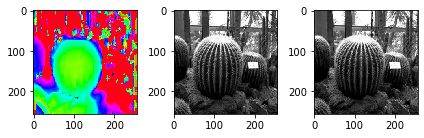

In [10]:
print("    1:disparity map      2:left image        3:right image")
fig = plt.figure()
plt.subplot(131)
plt.imshow(final, cmap=plt.get_cmap('hsv'))
plt.subplot(132)
plt.imshow(left, cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(right, cmap=plt.get_cmap('gray'))
fig.tight_layout()
plt.show()